In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False
font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False
data_path = './data/geo/'

2025-07-23 15:24:40.335162: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-07-23 15:24:40.335203: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-07-23 15:24:40.335212: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-07-23 15:24:40.335226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-23 15:24:40.335237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


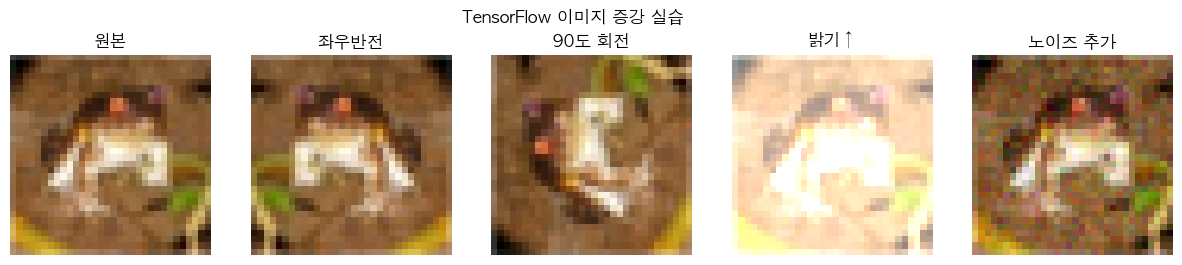

In [2]:


# CIFAR-10 이미지 한 장 불러오기
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
img = x_train[0]
img = tf.convert_to_tensor(img)

plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plt.imshow(img.numpy().astype('uint8'))
plt.title('원본')
plt.axis('off')

# 좌우 반전
flipped = tf.image.flip_left_right(img)
plt.subplot(1,5,2)
plt.imshow(flipped.numpy().astype('uint8'))
plt.title('좌우반전')
plt.axis('off')

# 회전 (90도)
rotated = tf.image.rot90(img)
plt.subplot(1,5,3)
plt.imshow(rotated.numpy().astype('uint8'))
plt.title('90도 회전')
plt.axis('off')

# 밝기 증가
bright = tf.image.adjust_brightness(img, delta=0.5)
plt.subplot(1,5,4)
plt.imshow(bright.numpy().clip(0,255).astype('uint8'))
plt.title('밝기↑')
plt.axis('off')

# 랜덤 노이즈 추가 (텐서 연산 활용)
import numpy as np
noise = tf.random.normal(shape=img.shape, mean=0.0, stddev=10.0)
img_noise = tf.cast(tf.clip_by_value(tf.cast(img, tf.float32) + noise, 0, 255), tf.uint8)
plt.subplot(1,5,5)
plt.imshow(img_noise.numpy())
plt.title('노이즈 추가')
plt.axis('off')

plt.suptitle('TensorFlow 이미지 증강 실습')
plt.show()
